# Stock Prediction!
#### (using Linear Regression)
###### Stocks is something which is very interesting to predict.There are many factors which can cause change in stock prices but here the factors like open price,high,low and volume is taken to predict the closing stock.

### Imports 

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import math

### Data preprocessing

In [34]:
data=pd.read_csv('stock.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
1,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
3,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
4,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2579 non-null   object 
 1   Open       2579 non-null   float64
 2   High       2579 non-null   float64
 3   Low        2579 non-null   float64
 4   Close      2579 non-null   float64
 5   Adj Close  2579 non-null   float64
 6   Volume     2579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.2+ KB


In [36]:
data.shape

(2579, 7)

In [37]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
std,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,59.339000,60.171000,57.841000,59.020001,59.020001,3.979150e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


In [38]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

###### Data does not have any null or missing values and is good to go..!

### Splitting X and Y

In [39]:
X=data[['High','Low','Open','Volume']].values
y=data['Close'].values
print(X)

[[6.08400000e+00 4.66000000e+00 5.15800000e+00 8.59355000e+07]
 [5.18400000e+00 4.05400000e+00 5.00000000e+00 4.10940000e+07]
 [4.62000000e+00 3.74200000e+00 4.60000000e+00 2.56990000e+07]
 ...
 [4.12149994e+02 3.75880005e+02 4.05160004e+02 9.50742000e+07]
 [3.99500000e+02 3.51299988e+02 3.63799988e+02 9.65611000e+07]
 [4.08730011e+02 3.91299988e+02 3.93470001e+02 6.70684000e+07]]


In [40]:
print(y)

[  4.766      4.392      3.84     ... 380.359985 387.790009 407.339996]


### ML Model Time!


In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [42]:
regr=LinearRegression()
regr.fit(x_train,y_train)
regr.coef_

array([ 8.87095614e-01,  5.85513083e-01, -4.76088446e-01, -1.00579988e-08])

In [43]:
pred=regr.predict(x_test)

In [44]:
pred_data=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':pred.flatten()})
pred_data.head()

,Actual,Predicted
0,48.598,48.287104
1,5.348,5.467965
2,68.570,67.815196
3,6.430,6.689864
4,49.812,50.574754


### Testing the accuracy of prediction

In [45]:
print("mean absolute error is ",round(metrics.mean_absolute_error(y_test,pred),3))
print("mean square error is ",round(metrics.mean_squared_error(y_test,pred),3))
print("mean squareroot error is ",round(math.sqrt(metrics.mean_squared_error(y_test,pred)),3))

mean absolute error is  0.469
mean square error is  0.903
mean squareroot error is  0.95


#### Visualtion of actual and predicted values

<AxesSubplot:>

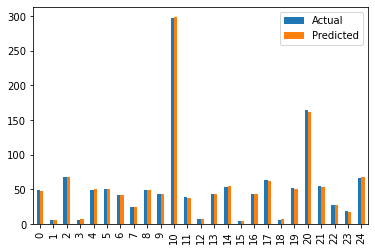

In [46]:
ex=pred_data.head(25)
ex.plot(kind='bar')

### Conclusion

##### It can be seen that the predicted and actual values are very much close to each other.The desired accuracy is obtained by this model.
###### Thank you!